### Torch - CUDA

In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

In [4]:
print(torch.version.cuda)

None


In [3]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 970'

In [4]:
torch.cuda.is_available()

True

In [2]:
import torch
torch.cuda.current_device()

0

In [5]:
print("Pytorch CUDA Version is ", torch.version.cuda)

Pytorch CUDA Version is  11.6


## Downloading datset

In [10]:
! wget -c https://www.dropbox.com/s/bc5e9ew17ldlfhx/part_label_test_128p_v2.tar &>/dev/null

The syntax of the command is incorrect.


## Downloading the model

In [2]:
! wget -c https://www.dropbox.com/s/38q1cgxt1qu407h/ptlabel_best_model.pth &>/dev/null

The syntax of the command is incorrect.


## Extracting

In [2]:
%%bash
if [ -z ${TMPDIR} ]; then TMPDIR='/tmp'; else echo "TMPDIR is set to $TMPDIR"; fi
echo $TMPDIR
PT_LABEL=part_label_test_128p_v2.tar
mkdir -p $TMPDIR/eval
tar -C $TMPDIR/eval -xf $PT_LABEL 

Couldn't find program: 'bash'


In [ ]:
#! git clone https://github.com/isi-vista/structure_via_consensus.git

In [ ]:
%%bash  
wget -c https://www.dropbox.com/s/x055zrg47kmz3x1/structure_via_consensus-master.zip &>/dev/null
unzip structure_via_consensus-master.zip
cp -r structure_via_consensus-master/src_release/ .

Archive:  structure_via_consensus-master.zip
396b3d4513205c2245610c1e30b45bb2bba861bc
   creating: structure_via_consensus-master/
  inflating: structure_via_consensus-master/.gitignore  
  inflating: structure_via_consensus-master/LICENSE  
  inflating: structure_via_consensus-master/README.md  
   creating: structure_via_consensus-master/imgs/
  inflating: structure_via_consensus-master/imgs/teaser.png  
   creating: structure_via_consensus-master/src_release/
  inflating: structure_via_consensus-master/src_release/aug2D.py  
  inflating: structure_via_consensus-master/src_release/conf_matrix.py  
  inflating: structure_via_consensus-master/src_release/data_loader.py  
  inflating: structure_via_consensus-master/src_release/data_tools.py  
   creating: structure_via_consensus-master/src_release/models/
  inflating: structure_via_consensus-master/src_release/models/encoder_decoder_faceoccnet.py  
  inflating: structure_via_consensus-master/src_release/part_label_dataset.py  
  inflati

In [ ]:
%%bash
rm -rf structure_via_consensus-master
rm structure_via_consensus-master.zip

# Define and Load Model

In [4]:
pip install torch

SyntaxError: invalid syntax (3280090445.py, line 1)

In [5]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.1/1.1 MB 23.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!conda install pandas

^C


# START OF CODE FOR REAL
---

In [6]:
import sys
import os
import torch
import torchvision
import numpy as np
import pandas as pd
sys.path.append('src_release')

In [7]:
from data_loader import get_dataloader
from models.encoder_decoder_faceoccnet import FaceOccNet 
from torch_utils import torch_load_weights,evaluation,viz_notebook,plot_confusion_matrix

## JPG TO PNG 24-BIT
---

In [8]:
from PIL import Image
import shutil

path = "to_png\\"
filename = "couple"

# Convert to png 24-bit
img_path = path + filename + ".jpg"
png = Image.open(img_path)

# Save the png
png.save(path + filename + "_image_final.png")

# Create the black _cc_occ_labels and _sp_labels (16 bit pngs)
cc_occ_png = filename + "_cc_occ_labels.png"
sp_png = filename + "_sp_labels.png"

# black.png is reference image being duplicated
shutil.copyfile("to_png\\black.png", ("to_png\\" + cc_occ_png))
shutil.copyfile("to_png\\black.png", ("to_png\\" + sp_png))

# Delete the original couple.jpg
# os.remove(img_path)

FileNotFoundError: [Errno 2] No such file or directory: 'to_png\\couple.jpg'

## FACE SEG MODEL
---

In [9]:
load_model_path = ("./ptlabel_best_model.pth")
eval_path = "to_png"
model = FaceOccNet(input_channels=3, n_classes=3,is_regularized=True)

In [10]:
print(eval_path)

to_png


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

FaceOccNet(
  (model_enc): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ELU(alpha=1.0, inplace=True)
    (3): ReflectionPad2d((1, 1, 1, 1))
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ELU(alpha=1.0, inplace=True)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReflectionPad2d((1, 1, 1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ELU(alpha=1.0, inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReflectionPad2d((1, 1, 1, 1))
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): ELU(alpha=1.0, inplace=True)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReflectionPad2d((1, 1, 1, 1))
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (17): ELU(alpha=1.0, inplace=Tru

In [12]:
from torchsummary import summary
print('[Start] Model')
print(model)
print('[End] Model')    
print('[Start] Keras viz')
summary(model,(3,128,128))
print('[End] Keras viz')

[Start] Model
FaceOccNet(
  (model_enc): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ELU(alpha=1.0, inplace=True)
    (3): ReflectionPad2d((1, 1, 1, 1))
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ELU(alpha=1.0, inplace=True)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReflectionPad2d((1, 1, 1, 1))
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ELU(alpha=1.0, inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReflectionPad2d((1, 1, 1, 1))
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): ELU(alpha=1.0, inplace=True)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReflectionPad2d((1, 1, 1, 1))
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (17): ELU(alpha=1.

In [13]:
# You have to set def load in serialization.py to have its map_location parameter = 'cpu'
if os.path.exists(load_model_path) and os.path.isfile(load_model_path):
    _, _ = torch_load_weights(model, None, load_model_path, model_only=True)
    print(f'Loaded model from {load_model_path}')
else:
    print(f'The model does not exist in {load_model_path} or is not a file')

Loaded model from ./ptlabel_best_model.pth


## Data Loader

In [28]:
name2class = {'bg':0,'face':1,'hair':2}
eval_dataloader = get_dataloader( (eval_path,),
                                  batch_size=64,
                                  mode='eval', 
                                  num_workers = 4,
                                  n_classes=3,
                                  dataset_name='PartLabel')

2023-02-22 10:38:08,663 - part_label_dataset - INFO - reading the image files...
2023-02-22 10:38:08,664 - part_label_dataset - INFO - finished initializing the dataloader 3 files.


In [24]:
import matplotlib.pyplot as plt
for x, y in enumerate(eval_dataloader):    
    print("x is: ", x)
    print("ENDENDNENDENDNENDENDENDN")
    print("y is: ", y)

x is:  0
ENDENDNENDENDNENDENDENDN
y is:  [tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1.,

# 128 pixel rez

### You don't actually need to run this evaluation. This is just for a confusion matrix. Rather, you can jump straight to visualization

## Evaluation

In [10]:
conf_matrix_px_128, conf_matrix_super_px_128, result_128 = evaluation(model,eval_dataloader,name2class,is250=False,string_label='eval',n_classes=3,super_px=True)
assert conf_matrix_px_128.conf_mat.sum()==128*128*927
pd.DataFrame({ k : [v] for k,v in result_128.items()})

2023-02-13 09:16:57,706 - torch_utils - INFO - -------------------eval------------------
eval: 100%|████████████████████████████████████████████████████████████████████████████| 15/15 [01:01<00:00,  4.07s/it]
2023-02-13 09:18:10,851 - torch_utils - INFO - eval global_pix_acc_sp:0.968246
2023-02-13 09:18:10,852 - torch_utils - INFO - eval global_pix_acc:0.960561
2023-02-13 09:18:10,852 - torch_utils - INFO - eval avg_recall:0.932198
2023-02-13 09:18:10,853 - torch_utils - INFO - eval----
2023-02-13 09:18:10,854 - torch_utils - INFO - eval bg_recall:0.976434
2023-02-13 09:18:10,855 - torch_utils - INFO - eval bg_precision:0.980108
2023-02-13 09:18:10,855 - torch_utils - INFO - eval bg_iou:0.957460
2023-02-13 09:18:10,856 - torch_utils - INFO - eval----
2023-02-13 09:18:10,857 - torch_utils - INFO - eval bg_f_measure:0.978268
2023-02-13 09:18:10,857 - torch_utils - INFO - eval----
2023-02-13 09:18:10,858 - torch_utils - INFO - eval face_recall:0.955247
2023-02-13 09:18:10,859 - torch_util

,pix_acc,spix_acc,bg_recall,bg_precision,bg_IoU,bg_f_measure,face_recall,face_precision,face_IoU,face_f_measure,hair_recall,hair_precision,hair_IoU,hair_f_measure,mean_iou,err_l1_cc
0,0.960561,0.968246,0.976434,0.980108,0.95746,0.978268,0.955247,0.94646,0.906275,0.950833,0.864912,0.860217,0.758332,0.862558,0.874022,3.514563


In [11]:
result_128.items()

dict_items([('pix_acc', 0.9605607544076996), ('spix_acc', 0.9682459762722765), ('bg_recall', 0.9764342531896808), ('bg_precision', 0.9801081864180184), ('bg_IoU', 0.957460029224418), ('bg_f_measure', 0.9782677704063071), ('face_recall', 0.955247138823181), ('face_precision', 0.9464602126592612), ('face_IoU', 0.906274897979715), ('face_f_measure', 0.9508333755432568), ('hair_recall', 0.8649120913838765), ('hair_precision', 0.8602170559475735), ('hair_IoU', 0.7583316994432615), ('hair_f_measure', 0.8625581847649918), ('mean_iou', 0.8740222088824648), ('err_l1_cc', 3.5145631067961167)])

## Plot Confusion Matrix

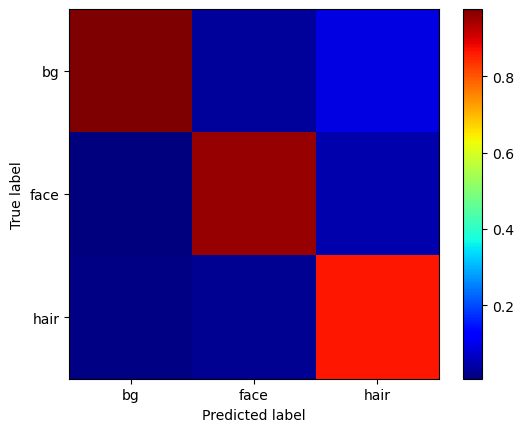

In [12]:
plot_confusion_matrix(conf_matrix_px_128,name2class)

## Visualization of 1st batch

In [29]:
from tqdm import tqdm as tqdm
from skimage import measure
import matplotlib.pyplot as plt
from data_tools import decode_mask2img,encode_img2mask

'''
Visualization function for tensorboard and notebook
'''
def tf_viz_img(mask_tmp,i,pred=True):
    if pred:
        mask_tmp = torch.argmax(mask_tmp[i], dim=0).numpy().copy()
    else:
        mask_tmp = mask_tmp[i].numpy().copy()
    mask_tmp = decode_mask2img(mask_tmp)
    mask_tmp = np.transpose(mask_tmp, (2,0,1))
    mask_tmp = mask_tmp / 255.0
    return mask_tmp

'''
Main Visualization function
'''
def viz_notebook_brew(model,eval_dataloader,device,ibv_stop=-1):
    import matplotlib.pyplot as plt
    
    FOLDER_PATH = '.\\images'
        
    unorm = torchvision.transforms.Compose([ torchvision.transforms.Normalize((-1, -1, -1), (2, 2, 2))])
    #batch_val = iter(eval_dataloader).next()
    model.eval()
    
    with torch.no_grad():
        for ibv, batch_val in tqdm(enumerate(eval_dataloader),
                               desc='viz'):
            img, mask_gt, mask_sp, fn = batch_val
            pred_mask, _ = model(img.to(device))
            pred_mask = pred_mask.cpu()
            mask_gt = mask_gt.cpu().data
            for b in range(pred_mask.shape[0]):
                pred_tmp = tf_viz_img(pred_mask,b,pred=True)
                # mask_gt_tmp = tf_viz_img(mask_gt,b,pred=False)
                pred_tmp = np.transpose(pred_tmp, (1,2,0))
                # mask_gt_tmp = np.transpose(mask_gt_tmp, (1,2,0))
                ##plotting
                fig = plt.figure()
                plt.subplot(1,3,1)
                plt.title(f'Image {img[b].shape[2]}')
                plt.imshow(np.transpose(unorm(img[b]), (1,2,0)))
                plt.axis('off')
                print("IMAGE FILENAME IS: " + fn[0])
                
                # TURN THE BLUE AND GREEN PRED_TMP TO WHITE
                # Convert non-black pixels to white
                non_black_pixels_mask = np.any(pred_tmp != [0, 0, 0], axis=-1)  
                pred_tmp[non_black_pixels_mask] = [1, 1, 1]                                
                                
                plt.subplot(1,3,2)
                plt.title(f'Prediction {pred_tmp.shape[0]}')
                plt.imshow(pred_tmp)
                plt.axis('off')                                                                                
                plt.imsave('IMHEREIMHERE.png', pred_tmp)
                #print((pred_tmp))
                
                # plt.subplot(1,3,3)
                # plt.title(f'Ground-Truth {mask_gt_tmp.shape[0]}')
                # plt.imshow(mask_gt_tmp)
                # plt.axis('off')                                
                plt.show()
                plt.close(fig)
            if ibv_stop == ibv:
                break
        

viz: 0it [00:00, ?it/s]

IMAGE FILENAME IS: couple_0_image_final.png


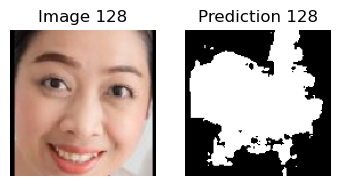

IMAGE FILENAME IS: couple_0_image_final.png


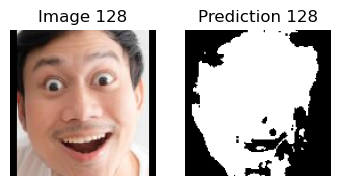

IMAGE FILENAME IS: couple_0_image_final.png


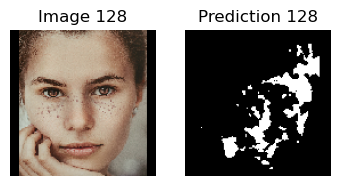

viz: 0it [00:03, ?it/s]


In [30]:
pred_tmp = viz_notebook_brew(model,eval_dataloader,device,ibv_stop=0)

In [73]:
# Count the number of pixels
sum_pred = pred_tmp.sum(axis=2)

total_pixels = 0
for pixel_arr in sum_pred:
    for pixel in pixel_arr:
        if pixel > 0:
            total_pixels += 1
        
print(total_pixels)

8387


# 250 pixel rez

In [ ]:
%%bash
wget -c https://www.dropbox.com/s/ylfyupbxg642tnb/part_label_test_250p_v2.tar &>/dev/null

In [ ]:
%%bash
if [ -z ${TMPDIR} ]; then TMPDIR='/tmp'; else echo "TMPDIR is set to $TMPDIR"; fi
echo $TMPDIR
PT_LABEL=part_label_test_250p_v2.tar
mkdir -p $TMPDIR/eval-250
tar -C $TMPDIR/eval-250 -xf $PT_LABEL 

/tmp


In [ ]:
eval_250_path = os.path.join('/tmp','eval-250/part_label_test_250p')

In [ ]:
name2class = {'bg':0,'face':1,'hair':2}
eval_dataloader_250 = get_dataloader( (eval_250_path,),
                                  batch_size=64,
                                  mode='eval', num_workers=0,
                                  n_classes=3,
                                  dataset_name='PartLabel')

2020-03-18 01:10:06,278 - part_label_dataset - WARNING - We are processing part labels for 250p case!
2020-03-18 01:10:06,280 - part_label_dataset - INFO - reading the image files...
2020-03-18 01:10:06,297 - part_label_dataset - INFO - finished initializing the dataloader 927 files.


In [ ]:
conf_matrix_px_250, conf_matrix_super_px_250, result_250 = evaluation(model,eval_dataloader_250,name2class,is250=True,string_label='eval',n_classes=3,super_px=True)

2020-03-18 01:10:17,586 - torch_utils - INFO - -------------------eval------------------
eval:   0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
eval: 100%|██████████| 15/15 [05:40<00:00, 19.82s/it]
2020-03-18 01:15:57,715 - torch_utils - INFO - eval global_pix_acc_sp:0.967832
2020-03-18 01:15:57,716 - torch_utils - INFO - eval global_pix_acc:0.958594
2020-03-18 01:15:57,717 - torch_utils - INFO - eval avg_recall:0.929323
2020-03-18 01:15:57,718 - torch_utils - INFO - eval----
2020-03-18 01:15:57,720 - torch_utils - INFO - eval bg_recall:0.975761
2020-03-18 01:15:57,721 - torch_utils - INFO - eval bg_precision:0.978775
2020-03-18 01:15:57,722 - torch_utils - INFO - eval bg_iou:0.955542
2020-03-18 01:15:57,723 - torch_utils - INFO - eval----
2020-03

## Final Result

In [ ]:
result = {}
for k,v in result_128.items():
    if k != 'err_l1_cc':
        result[k] = [v*100,result_250[k]*100]
    else:
        result[k] = [v,result_250[k]]
import pandas as pd
pd.DataFrame(result,index=['128p','250p'])

,pix_acc,spix_acc,bg_recall,bg_precision,bg_IoU,bg_f_measure,face_recall,face_precision,face_IoU,face_f_measure,hair_recall,hair_precision,hair_IoU,hair_f_measure,mean_iou,err_l1_cc
128p,96.056839,96.802146,97.643728,98.010945,95.746415,97.826992,95.525846,94.646360,90.628819,95.084069,86.495882,86.029339,75.842694,86.261979,87.405976,3.513484
250p,95.859371,96.783240,97.576120,97.877508,95.554237,97.726582,94.918409,94.572512,90.014987,94.745145,86.302288,85.198947,75.050212,85.747068,86.873145,3.641855


In [ ]:
assert conf_matrix_px_250.conf_mat.sum()==250*250*927

## Plot Confusion Matrix

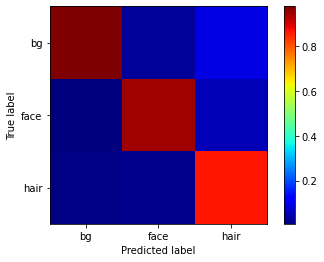

In [ ]:
plot_confusion_matrix(conf_matrix_px_250,name2class)